## Week 3_Logistic Regression Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ex2data1.txt', names = ['Test1', 'Test2', 'Results'])

In [3]:
df.head()

,Test1,Test2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Test1      100 non-null float64
Test2      100 non-null float64
Results    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB
None
            Test1       Test2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [5]:
# dividing the dataset into input and output
X1 = df[['Test1','Test2']].values
y1 = df['Results'].values

In [6]:
passed = (y1 == 1).reshape(100,1)
fail = (y1 == 0).reshape(100, 1)

### Plotting the data points

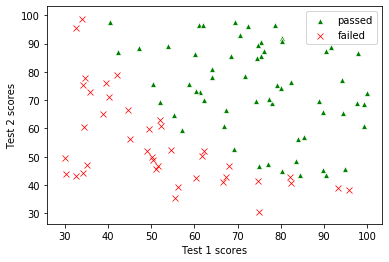

In [7]:
ax = sns.scatterplot(x = X1[passed[:,0], 0], y = X1[passed[:,0], 1], marker ='^', color = 'green');
sns.scatterplot(x = X1[fail[:,0], 0], y = X1[fail[:,0], 1], marker = 'x', color = 'red');
plt.xlabel('Test 1 scores');
plt.ylabel('Test 2 scores');
plt.legend(['passed', 'failed']);

### sigmoid function

In [8]:
m = len(X1)
theta = np.zeros((3,1))
iterations = 800
alpha = 0.01
# z = np.dot(X, theta)

In [9]:
def logistic_function(z):
    return 1/(1 + np.exp(-z))

In [10]:
logistic_function(0)

0.5

### Feature Normalization

In [11]:
X2 = (X1 - X1.mean())/X1.std()
y = y1.reshape(m,1)

In [12]:
#Adding the intercept
X = np.append(np.ones((m,1)), X2, axis = 1)

### Cost function and gradient

$$J(θ) = 1/m \sum \limits _{i=1} ^ {m} [− y^{(i)} log(h_{θ}(x^{(i)})) − (1 − y^{(i)})  log(1 − h_{θ}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [13]:
def cost_function(theta, X, y):
    y_pred = logistic_function(np.dot(X, theta))
    error = (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost = -1/m * np.sum(error)
    return cost

In [14]:
# Cost function before optimization
cost_function(theta, X, y)

0.6931471805599453

In [15]:
#Theta at initialization
theta

array([[0.],
       [0.],
       [0.]])

In [16]:
def gradient(theta, X, y, alpha, iterations):
    costs = []
    for i in range(iterations):  
        y_pred = logistic_function(np.dot(X, theta))
        gradient = 1/m * (np.dot( X.transpose(), (y_pred - y)))
        theta -= (alpha * gradient)
        cost = cost_function(theta, X, y)
        costs.append(cost)
    return costs, theta

In [17]:
costs, theta = gradient(theta, X, y, 1, 200)

In [18]:
costs[-1]

0.20487583848289817

In [19]:
theta

array([[1.50974706],
       [3.46929196],
       [3.37127114]])

In [20]:
# Cost function after optimization
cost_function(theta, X, y)

0.20487583848289817

### Plot of cost functions over  iterations

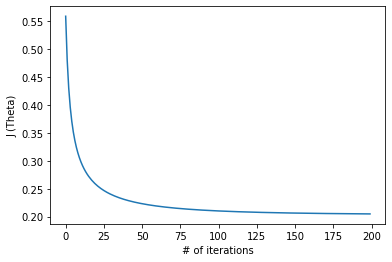

In [21]:
plt.plot(costs);
plt.xlabel('# of iterations')
plt.ylabel('J (Theta)');

In [22]:
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

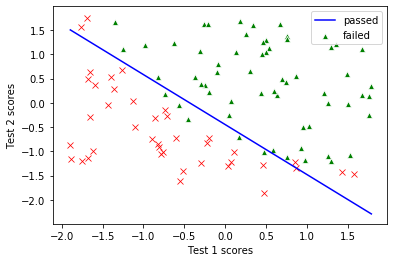

In [23]:
ax = sns.scatterplot(x = X2[passed[:,0], 0], y = X2[passed[:,0], 1], marker ='^', color = 'green');
sns.scatterplot(x = X2[fail[:,0], 0], y = X2[fail[:,0], 1], marker = 'x', color = 'red');
sns.lineplot(x = x_boundary, y = y_boundary, color = 'blue')
plt.xlabel('Test 1 scores');
plt.ylabel('Test 2 scores');
plt.legend(['passed', 'failed']);

### Predicting pass percentage for a score of 50 in test 1 and 79 in test 2

In [24]:
x = np.array([1, 50, 79])
x = (x-X1.mean())/X1.std()

In [25]:
x = np.array([1, -0.84158144,  0.69018617])

In [26]:
y_pred = logistic_function(np.dot(x, theta))

In [27]:
y_pred

array([0.71440189])